Carles Falcó i Gandia

Perm Number: 7621931

falcoigandia@ucsb.edu

In [1]:
# Python modules
from numpy import asarray, array, zeros, linspace, sqrt, sin
import matplotlib.pyplot as plt

# Simple Simpson rule from Hermite interpolation

We'll find the simple Simpson Rule on $[-1,1]$ by approimating the integrand $f$ with the Hermite-interpolation polynomial which interpolates $f(-1),f(0),f'(0)$ and $f(1)$. First we construct the table of Newton differences:

$$
\begin{array}{|c|c|ccc}
-1 & f(-1) \\
    &     & f(0)-f(-1) \\
0 & f(0) &             & f'(0)-f(0)+f(-1)\\
    &     & f'(0)  &              & \frac{1}{2}\big(f(1)-f'(-1)-2f'(0)\big)\\
0 & f(0) &             & f(1)-f(0)-f'(0)\\
    &     & f(1)-f(0)\\
1 & f(1) \\
\end{array}
$$

Then the Hermite-interpolating polynomial is:
$$p(x) = f(-1) + (x+1)\big(f(0)-f(-1)\big)+x(x+1)\big(f'(0)-f(0)+f(-1)\big)$$
$$+x^2(x+1)\big(\frac{1}{2}f(1)-\frac{1}{2}f(-1)-f'(0)\big)$$


Now we can approximate:
$$\int_{-1}^1f(x)dx\approx\int_{-1}^{1} p(x) dx$$ $$= 2f(-1) + 2\big(f(0)-f(-1)\big)+\frac{2}{3}\big(f'(0)-f(0)+f(-1)\big)+\frac{2}{3}\big(\frac{1}{2}f(1)-\frac{1}{2}f(-1)-f'(0)\big)$$
$$ = \frac{1}{3}\Big(f(-1)+4f(0)+f(1)\Big)$$

which is the simple Simpson rule on $[-1,1]$.

But how about the error? We know that the error we make by approximating $f$ by its interpolating polynomial is given by the Cauchy remainder:
$$\frac{1}{4!}f^{4)}(\eta(x))(x+1)x^2(x-1) = \frac{1}{4!}f^{4)}(\eta(x))(x^2-1)x^2 $$ with $\eta(x)\in(-1,1)$. Since $x^2(x^2-1)\leq 0$ on $(-1,1)$ we can use the weighted mean value theorem for integrals to evaluate this error. Integrating, $\exists\eta\in(-1,1)$ such that:
$$\int_{-1}^1 \frac{1}{4!}f^{4)}(\eta(x))x^2(x^2-1) dx = \frac{1}{4!}f^{4)}(\eta) \int_{-1}^1x^2(x^2-1) dx = -\frac{1}{90}f^{4)}(\eta)$$

All in all we can write:
$$\int_{-1}^1f(x)dx = \frac{1}{3}\Big(f(-1)+4f(0)+f(1)\Big)-\frac{1}{90}f^{4)}(\eta)$$
with $\eta\in(-1,1)$.

# Approximating the integral 

of $$f(x) =   \begin{cases}
    1+x, & \text{for } -1 \leq x \leq 0 \\
    1-x, & \text{for } 0 \leq x \leq 1 \\
  \end{cases}$$

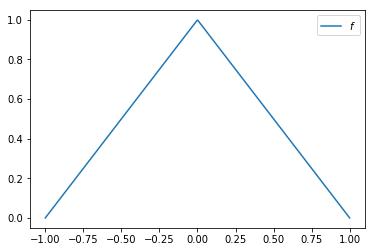

In [2]:
# Plotting f
# Carles Falcó i Gandia
# 25/01/2019

def f(x):
    y = asarray(x)
    f = zeros(y.size)
    f += ((-1 < y) & (y <= 0)) * (1 + y) +((0 < y) & (y < 1)) * (1 - y)
    return f

t_1 = linspace(-1,1,500)
plt.plot(t_1,f(t_1),label = '$f$')
plt.legend()
plt.show()

The actual value of the integral is obviously 1.

(a) Using the simple Trapezoidal rule. This is:
$$\int_{-1}^{1}f(x)dx \approx \frac{1}{2}\big(f(1)+f(-1)\big)\big(1-(-1)\big) = 0$$
So we are making an error of 1.

(b) Using the simple Simpson rule. This is:
$$\int_{-1}^{1}f(x)dx \approx \frac{1}{3}\big(f(-1)+4f(0)+f(1)\big) = \frac{4}{3}$$
The error in this approximation is $\frac{1}{3}$.

(c) Using the simple Trapezoidal rule over $[-1,0]$ and then over $[0,1]$. Note that $f$ is $C^{\infty}$ on $(-1,0)$ and also on $(0,1)$. Moreover $f''(x) = 0$ for $x$ in these intervals. Since the error in the simple Trapezoidal rule depends on the second derivative of $f$ we should get the exact value of the integral. In this case:
$$\int_{-1}^{1}f(x)dx = \int_{-1}^{0}f(x)dx + \int_{0}^{1}f(x)dx \approx \frac{1}{2}\big(f(1)+f(0)\big)\big(0-(-1)\big) + \frac{1}{2}\big(f(0)+f(1)\big)\big(1-0\big) = 1$$
as we expected. 

However in cases (a) and (b) we couldn't estimate the error by using the derivatives of $f$. This is because $f$ is not differentiable in $x=0$ and then it is not smooth on $[-1,1]$.

# Constructing a quadrature
of the form:
$$\int_{-1}^{1}f(x)dx \approx A_0 f(-1) + A_1f(0)+A_2f(1)$$
which is exact for polynomials of degree $\leq 2$. That means that:

$$\int_{-1}^1 dx = 2 = A_0 + A_1 + A_2$$

$$\int_{-1}^1 xdx = 0 = -A_0 +A_2$$

$$\int_{-1}^1 x^2dx = 2/3 = A_0 + A_2$$

Which means that $A_0 = A_2 = 1/3$ and $A_1 = 4/3$. Thus, the quadrature 
$$\int_{-1}^{1}f(x)dx \approx \frac{1}{3}\big(f(-1) + A_1f(0)+A_2f(1)\big)$$
has degree of precision at least $2$ and then it is exact for polynomials of degree $\leq 2$.
In fact this is the Simpson simple quadrature which we know has degree of precision $3$.

(a) We'll derive the 3-point Gaussian quadrature to approximate $\int_{-1}^{1}f(x)dx$. For the weight function $w(x) = 1$ the orthogonal polynomials are Legendre polynomials. We need 3 nodes, and the third Legendre polynomial is:
$$\psi_3(x) = x^3-\frac{3}{5}x$$
Its zeros are: $x_0 = - \sqrt{\frac{3}{5}}, x_1 = 0$ and $x_2 = \sqrt{\frac{3}{5}}$. Then the quadrature can be written as:
$$\int_{-1}^{1}f(x)dx \approx A_0 f(- \sqrt{\frac{3}{5}}) + A_1f(0)+A_2f(\sqrt{\frac{3}{5}})$$

Now to find the coefficients $A_0,A_1$ and $A_2$ we'll use the method of unknown coefficients. Knowing that the quadrature is exact for $1,x,x^2$:
$$\int_{-1}^1 dx = 2 = A_0 + A_1 + A_2$$

$$\int_{-1}^1 xdx = 0 = -A_0\sqrt{\frac{3}{5}} +A_2\sqrt{\frac{3}{5}}$$

$$\int_{-1}^1 x^2dx = 2/3 = \frac{3}{5}A_0 + \frac{3}{5}A_2$$

This system has solution:
$$A_0 = A_2 = \frac{5}{9},\;A_1 = \frac{8}{9}$$
and thus:
$$\int_{-1}^{1}f(x)dx \approx \frac{5}{9} f\Big(- \sqrt{\frac{3}{5}}\Big) + \frac{8}{9}f(0)+\frac{5}{9}f\Big(\sqrt{\frac{3}{5}}\Big)$$

(b) We can verify its degree of precision, which should be $2\cdot2+1=5$. This means that the quadrature should be exact for $1,x,x^2,x^3,x^4,x^5$ but not for $x^6$. For $n\geq 0$ the value of the integral of $x^n$ is:
$$\frac{1}{n+1}-\frac{(-1)^{n+1}}{n+1}$$

We know that it is exact for $n=0,1,2$ already. We just need to compute the cases $n=3,4,5,6$. Obviously if $n$ is odd both the quadrature and the integral are $0$. Now if $n=4$ the integral gives us $2/5$. The quadrature results in $\frac{1}{9}(\frac{9}{25}\cdot2\cdot 5) = \frac{2}{5}$. However when $n = 6$ the quadrature gives $6/25\neq2/7$. Then the degree of precision of the quadrature is $5$ as expected. We can ckeck it easily.

In [3]:
# Verifying degree of precision
# Carles Falcó i Gandia
# 25/01/2019

for n in range(1,7):
    integral = 1/(n+1) - (-1)**(n+1)/(n+1)
    quad = 1/9*(5*(-sqrt(3/5))**n + 5*(sqrt(3/5))**n )
    print("Integrating x^%i\n Exact integral = %f\n Result of the quadrature = %f\n" 
          % (n, integral, quad))

Integrating x^1
 Exact integral = 0.000000
 Result of the quadrature = 0.000000

Integrating x^2
 Exact integral = 0.666667
 Result of the quadrature = 0.666667

Integrating x^3
 Exact integral = 0.000000
 Result of the quadrature = 0.000000

Integrating x^4
 Exact integral = 0.400000
 Result of the quadrature = 0.400000

Integrating x^5
 Exact integral = 0.000000
 Result of the quadrature = 0.000000

Integrating x^6
 Exact integral = 0.285714
 Result of the quadrature = 0.240000



(c) Accuracy of this Gaussian quadrature in comparision with the simple Simpson rule for approximating $\int_{-1}^1e^xdx = e-e^{-1}$.
* Using Simpson rule we have:
$$\int_{-1}^1e^xdx\approx \frac{1}{3}(e^{-1}+4+e)$$
which gives an error:
$$\epsilon = \frac{1}{3}(e-4-4e^{-1})\approx -0.92$$

* Using the quadrature we obtain:
$$\int_{-1}^1e^xdx\approx \frac{1}{9}(5e^{-\sqrt{3/5}}+4+5e^{\sqrt{3/5}})$$ 
which gives an error:
$$\epsilon \approx 0.44$$

So by using the quadrature and only 3 nodes we have approximately half the error me made with the Simpson simple rule.

(d) Using the quadrature for $\int_a^bf(x)dx$. If we use the change of variable $x = \frac{1}{2}(a+b) + \frac{1}{2}(b-a)t$ for $t\in[-1,1]$ we can write $F(t) = f(x(t))$ and thus:
$$\int_a^bf(x)dx = \frac{1}{2}(b-a)\int_{-1}^1F(t)dt \approx \frac{b-a}{18} \Big[5F\Big(- \sqrt{\frac{3}{5}}\Big) + 8F(0)+{5}F\Big(\sqrt{\frac{3}{5}}\Big)\Big] = \frac{b-a}{18} \Big[5f(\alpha_{-}) + 8f(\frac{1}{2}(a+b))+{5}f(\alpha_{+})\Big]$$
where we defined:
$$\alpha_{\pm} = \frac{1}{2}\Big[a\big(1\mp\sqrt{\frac{3}{5}}\big)+b\big(1\pm\sqrt{\frac{3}{5}}\big)\Big]$$

We can use this to approximate:
$$\int_0^4\frac{\sin(x)}{x}dx\approx 1.75802203$$

In [4]:
# Approximating integral
# Carles Falcó i Gandia
# 25/01/2019

nodes = array([-sqrt(3/5),0,sqrt(3/5)])
b = 4
a = 0
def x(t):
    return 1/2*(a+b)+1/2*(b-a)*t

def quad(f):
    return (b-a)/18*(5*f(x(nodes[0])) + 8*f(x(nodes[1])) + 5*f(x(nodes[2])))

fun = lambda x: sin(x)/x
print("Approximated value of the integral = %.8f" % quad(fun))

Approximated value of the integral = 1.75802203
